# 1. Exploring SVM and Perceptron Performance (SVM vs Perceptron) [total: 70 Marks]

# Part 1: Default SVM Implementation and Analysis (10 Marks)

### 1. Install the required libraries (if needed)


In [ ]:
!pip install numpy scikit-learn matplotlib


### 2: Import Libraries and Dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 3: Dataset Definition

In [ ]:
# Dataset
X_Train = np.array([[1.3, 3.3], [1.4, 2.5], [1.8, 2.8], [1.9, 3.1], [1.5, 1.5], [1.8, 2], [2.3, 1.9], [2.4, 1.4], [2.4, 2.4], [2.4, 3], [2.7, 2.7], [2.3, 3.2]])
Y_Train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

X_Test = np.array([[1.7, 2.5], [1.9, 2.7], [2, 2.15], [2.4, 2], [2.2, 3.25], [2.4, 2.25]])
Y_Test = np.array([0, 0, 1, 1, 2, 2])


### 4: Model Training and Confusion Matrices


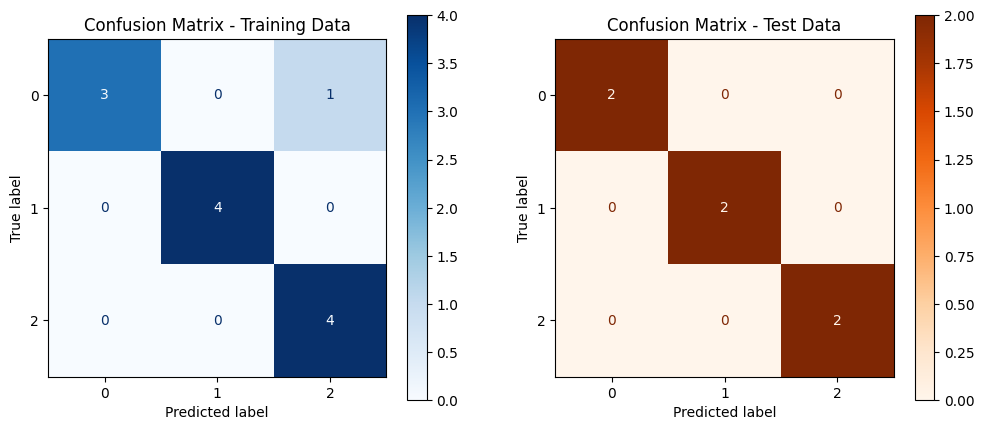

In [ ]:
# Default SVM model
model = svm.SVC(kernel='linear', random_state=42)   # I used kernel=Linear, option 2.
model.fit(X_Train, Y_Train)

# Predictions for both training and test data
Y_Train_Pred = model.predict(X_Train)
Y_Test_Pred = model.predict(X_Test)

# Confusion Matrices
train_cm = confusion_matrix(Y_Train, Y_Train_Pred)
test_cm = confusion_matrix(Y_Test, Y_Test_Pred)

# Display confusion matrices for both train and test data
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=[0, 1, 2]).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix - Training Data')

ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=[0, 1, 2]).plot(ax=ax[1], cmap='Oranges')
ax[1].set_title('Confusion Matrix - Test Data')

plt.show()

### 5. Code for Visualization of Decision Surfaces

<ipython-input-5-3ec8ffbcb15b>:33: UserWarning: You passed a edgecolor/edgecolors ('darkblue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, marker=marker, label=f'Test Class {i}',
<ipython-input-5-3ec8ffbcb15b>:33: UserWarning: You passed a edgecolor/edgecolors ('darkred') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, marker=marker, label=f'Test Class {i}',
<ipython-input-5-3ec8ffbcb15b>:33: UserWarning: You passed a edgecolor/edgecolors ('darkorange') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, marker=marker, label=f'Test Class {i}',


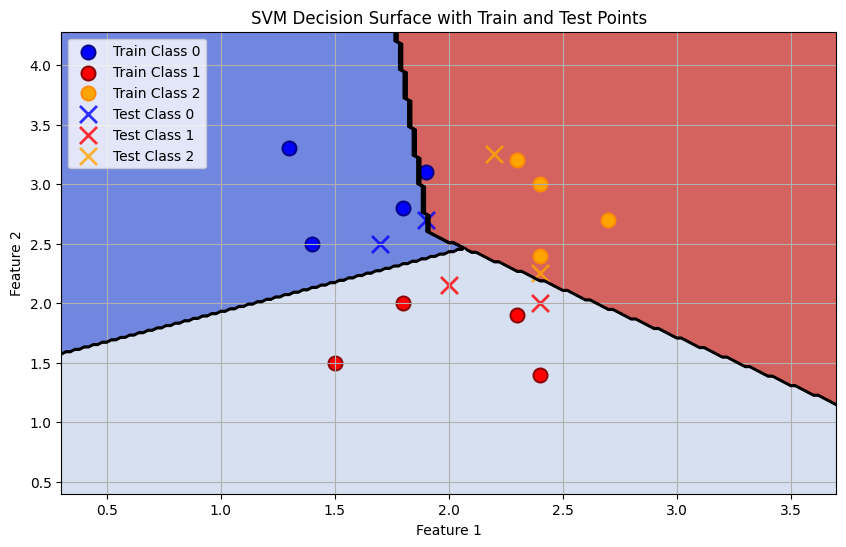

In [ ]:
# 7. Visualization of Decision Surfaces
def plot_decision_surface_with_classes(X_train, y_train, model, X_test=None, y_test=None):
    # Create mesh grid
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision surface with contour
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z, colors='k', linewidths=1)  # Optional: Add contour lines

    # Plot training data points with specific colors and shapes
    colors = ['blue', 'red', 'orange']
    markers = ['o', 'o', 'o']
    edge_colors = ['darkblue', 'darkred', 'darkorange']

    for i, color, marker, edge_color in zip(range(3), colors, markers, edge_colors):
        idx = np.where(y_train == i)
        plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, marker=marker, label=f'Train Class {i}',
                    edgecolors=edge_color, s=100, linewidth=1.5)

    # Plot test data points (if available) with different markers
    if X_test is not None and y_test is not None:
        test_markers = ['x', 'x', 'x']
        for i, color, marker, edge_color in zip(range(3), colors, test_markers, edge_colors):
            idx = np.where(y_test == i)
            plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, marker=marker, label=f'Test Class {i}',
                        edgecolors=edge_color, s=150, alpha=0.8, linewidth=2)

    # Add labels, title, and legend
    plt.title('SVM Decision Surface with Train and Test Points')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Call the function to visualize decision surface
plot_decision_surface_with_classes(X_Train, Y_Train, model, X_Test, Y_Test)


### Simplified Explanation (250 Words):


The decision surface for SVM in this case is influenced by the nature of the dataset, which is designed for multi-class classification. The SVM works by finding a hyperplane that best separates the data points belonging to different classes. In this case, since we're using a linear kernel, the decision boundaries will be straight lines that divide the feature space into regions corresponding to the different classes. The SVM tries to maximize the margin between the closest points (support vectors) of the classes, which results in decision boundaries that are quite sharp and straight in this scenario.

For this particular dataset, the distribution of points influences the behavior of the SVM. The points for each class are relatively well-separated, which allows the SVM to create clear boundaries between them. Since the classes are fairly distinct, the linear kernel works well to classify the data with high accuracy, and the decision surface is able to effectively separate the classes with minimal overlap.

The influence of the dataset is evident in how the model handles the overlap between the classes. For example, if any points from different classes were closer to each other or more intertwined, you would expect the SVM to struggle with classification, possibly misclassifying some points or resulting in a less clear decision boundary. In summary, the structure of the dataset, with relatively distinct class clusters, allows the SVM to create clear, straight-line decision boundaries using a linear kernel.

# Part 2: One-vs-Rest SVM and Perceptron Analysis (36 Marks)

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize


# Dataset
X_Train = np.array([[1.3, 3.3], [1.4, 2.5], [1.8, 2.8], [1.9, 3.1], [1.5, 1.5], [1.8, 2], [2.3, 1.9], [2.4, 1.4], [2.4, 2.4], [2.4, 3], [2.7, 2.7], [2.3, 3.2]])
Y_Train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

X_Test = np.array([[1.7, 2.5], [1.9, 2.7], [2, 2.15], [2.4, 2], [2.2, 3.25], [2.4, 2.25]])
Y_Test = np.array([0, 0, 1, 1, 2, 2])

### 1. Preparing the One-vs-Rest Labels

We'll transform the dataset for One-vs-Rest classification. For each class, we will create a binary label:

- Class 0 vs. Rest: Class 0 is labeled as 1; Classes 1 and 2 are labeled as 0.
- Class 1 vs. Rest: Class 1 is labeled as 1; Classes 0 and 2 are labeled as 0.
- Class 2 vs. Rest: Class 2 is labeled as 1; Classes 0 and 1 are labeled as 0.


In [ ]:
# Define the function to create One-vs-Rest labels
def create_one_vs_rest_labels(Y, class_index):
    return np.where(Y == class_index, 1, 0)

# Create One-vs-Rest labels for each class
Y_train_0 = create_one_vs_rest_labels(Y_Train, 0)
Y_train_1 = create_one_vs_rest_labels(Y_Train, 1)
Y_train_2 = create_one_vs_rest_labels(Y_Train, 2)

Y_test_0 = create_one_vs_rest_labels(Y_Test, 0)
Y_test_1 = create_one_vs_rest_labels(Y_Test, 1)
Y_test_2 = create_one_vs_rest_labels(Y_Test, 2)

### 2. Train One-vs-Rest SVM and Perceptron Models


In [ ]:
# Function to train and evaluate the models
def train_and_evaluate_model(X_train, Y_train, X_test, Y_test, model_class):
    model = model_class(random_state=42) if model_class == Perceptron else model_class(kernel='linear', random_state=42)
    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    return Y_train_pred, Y_test_pred, model

# Train and evaluate SVM and Perceptron for class 0 vs rest
Y_train_pred_0_svm, Y_test_pred_0_svm, model_svm_0 = train_and_evaluate_model(
    X_Train, Y_train_0, X_Test, Y_test_0, svm.SVC)
Y_train_pred_0_perc, Y_test_pred_0_perc, model_perc_0 = train_and_evaluate_model(
    X_Train, Y_train_0, X_Test, Y_test_0, Perceptron)

# Repeat for class 1 and class 2
Y_train_pred_1_svm, Y_test_pred_1_svm, model_svm_1 = train_and_evaluate_model(
    X_Train, Y_train_1, X_Test, Y_test_1, svm.SVC)
Y_train_pred_1_perc, Y_test_pred_1_perc, model_perc_1 = train_and_evaluate_model(
    X_Train, Y_train_1, X_Test, Y_test_1, Perceptron)

Y_train_pred_2_svm, Y_test_pred_2_svm, model_svm_2 = train_and_evaluate_model(
    X_Train, Y_train_2, X_Test, Y_test_2, svm.SVC)
Y_train_pred_2_perc, Y_test_pred_2_perc, model_perc_2 = train_and_evaluate_model(
    X_Train, Y_train_2, X_Test, Y_test_2, Perceptron)

In [ ]:
# Importing necessary libraries
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# One-vs-Rest SVM
ovr_svm = OneVsRestClassifier(svm.SVC(kernel='linear', random_state=42))
ovr_svm.fit(X_Train, Y_Train)

# One-vs-Rest Perceptron
ovr_perceptron = OneVsRestClassifier(Perceptron(random_state=42))
ovr_perceptron.fit(X_Train, Y_Train)

# Predictions for both models on training and test data
Y_Train_SVM_Pred = ovr_svm.predict(X_Train)
Y_Test_SVM_Pred = ovr_svm.predict(X_Test)

Y_Train_Perceptron_Pred = ovr_perceptron.predict(X_Train)
Y_Test_Perceptron_Pred = ovr_perceptron.predict(X_Test)

# Confusion Matrices
train_cm_svm = confusion_matrix(Y_Train, Y_Train_SVM_Pred)
test_cm_svm = confusion_matrix(Y_Test, Y_Test_SVM_Pred)

train_cm_perceptron = confusion_matrix(Y_Train, Y_Train_Perceptron_Pred)
test_cm_perceptron = confusion_matrix(Y_Test, Y_Test_Perceptron_Pred)

### 3. Calculate Confusion Matrices and Performance Metrics.

In [ ]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return cm, accuracy, precision, recall, f1

# Calculate and display metrics for each class and model
for class_label in [0, 1, 2]:
    print(f"\n--- Metrics for Class {class_label} vs Rest ---")

    # SVM Metrics
    train_preds, test_preds, _ = eval(f"Y_train_pred_{class_label}_svm"), eval(f"Y_test_pred_{class_label}_svm"), None
    cm, acc, prec, rec, f1 = calculate_metrics(eval(f"Y_train_{class_label}"), train_preds)
    print(f"SVM - Class {class_label}:\nConfusion Matrix:\n{cm}\nAccuracy: {acc}, Precision: {prec}, Recall: {rec}, F1: {f1}")

    # Perceptron Metrics
    train_preds, test_preds, _ = eval(f"Y_train_pred_{class_label}_perc"), eval(f"Y_test_pred_{class_label}_perc"), None
    cm, acc, prec, rec, f1 = calculate_metrics(eval(f"Y_train_{class_label}"), train_preds)
    print(f"Perceptron - Class {class_label}:\nConfusion Matrix:\n{cm}\nAccuracy: {acc}, Precision: {prec}, Recall: {rec}, F1: {f1}")



--- Metrics for Class 0 vs Rest ---
SVM - Class 0:
Confusion Matrix:
[[8 0]
 [2 2]]
Accuracy: 0.8333333333333334, Precision: 1.0, Recall: 0.5, F1: 0.6666666666666666
Perceptron - Class 0:
Confusion Matrix:
[[8 0]
 [0 4]]
Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0

--- Metrics for Class 1 vs Rest ---
SVM - Class 1:
Confusion Matrix:
[[8 0]
 [0 4]]
Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Perceptron - Class 1:
Confusion Matrix:
[[8 0]
 [1 3]]
Accuracy: 0.9166666666666666, Precision: 1.0, Recall: 0.75, F1: 0.8571428571428571

--- Metrics for Class 2 vs Rest ---
SVM - Class 2:
Confusion Matrix:
[[8 0]
 [0 4]]
Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0
Perceptron - Class 2:
Confusion Matrix:
[[6 2]
 [1 3]]
Accuracy: 0.75, Precision: 0.6, Recall: 0.75, F1: 0.6666666666666666


### 4. Visualize Decision Boundaries for SVM and Perceptron

<ipython-input-11-e10032d220c6>:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x')


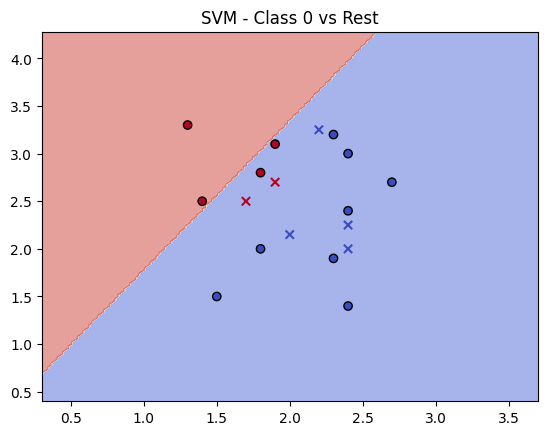

<ipython-input-11-e10032d220c6>:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x')


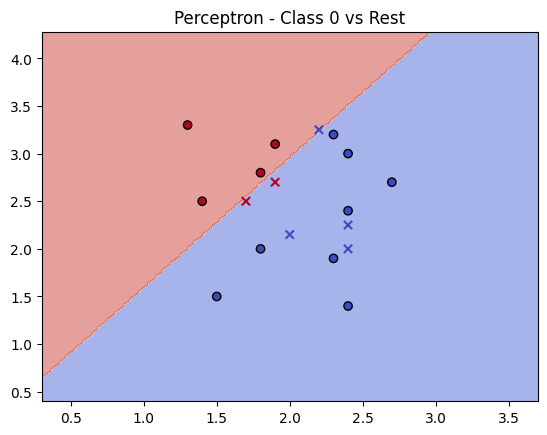

<ipython-input-11-e10032d220c6>:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x')


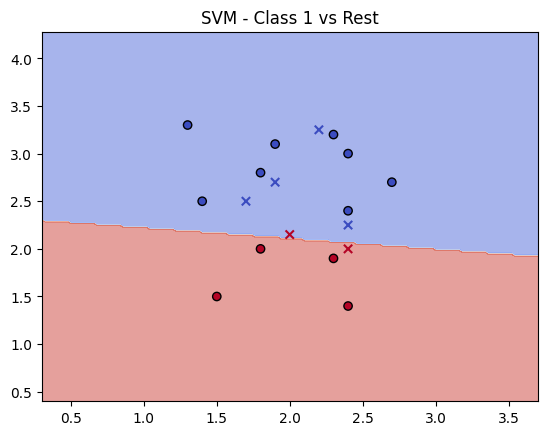

<ipython-input-11-e10032d220c6>:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x')


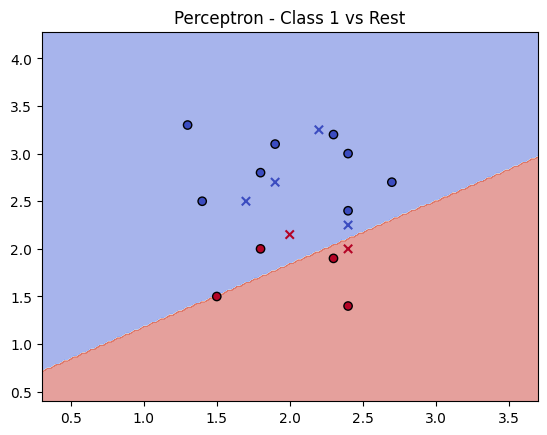

<ipython-input-11-e10032d220c6>:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x')


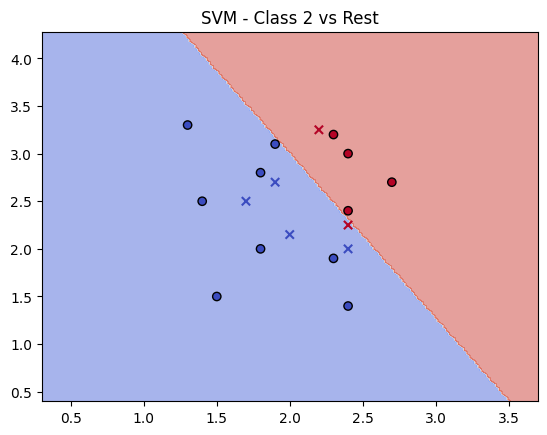

<ipython-input-11-e10032d220c6>:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x')


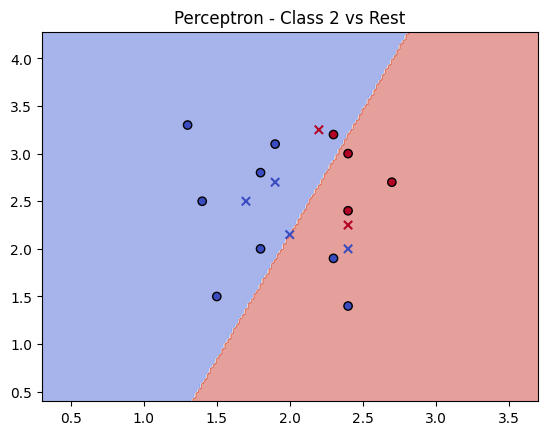

In [ ]:
# Function to plot decision surfaces
def plot_decision_surface(X_train, Y_train, model, X_test, Y_test, class_label, model_name):
    h = 0.02  # Step size for mesh grid
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, edgecolor='k', marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x')
    plt.title(f'{model_name} - Class {class_label} vs Rest')
    plt.show()

# Plot decision surfaces for SVM and Perceptron (all classes)
for class_label in [0, 1, 2]:
    plot_decision_surface(X_Train, eval(f"Y_train_{class_label}"), eval(f"model_svm_{class_label}"),
                          X_Test, eval(f"Y_test_{class_label}"), class_label, "SVM")
    plot_decision_surface(X_Train, eval(f"Y_train_{class_label}"), eval(f"model_perc_{class_label}"),
                          X_Test, eval(f"Y_test_{class_label}"), class_label, "Perceptron")


### 5. Discussion
The Perceptron aims to find a linear boundary that separates classes by adjusting weights based on misclassified points. It does this by using a simple threshold function that predicts class labels based on whether the weighted sum of inputs is above or below a certain value. This approach can lead to a decision boundary that is not optimal, as it does not focus on maximizing the distance from the nearest data points (support vectors) to the boundary. Consequently, the Perceptron may be sensitive to outliers and noise in the data.

In contrast, the SVM focuses on maximizing the margin, which is the distance between the decision boundary and the closest data points from either class. By doing this, SVM tends to produce a more robust and generalizable model, as it is less influenced by individual data points. This margin maximization leads to better performance, especially in complex datasets. Therefore, while both models create linear boundaries, SVM’s method of maximizing the margin typically results in a more reliable and accurate decision surface compared to the Perceptron’s threshold-based approach.

### 6. Experimentation Component

#### Step 1: Adding Noise to the Dataset
Here’s how to flip labels for 5% of the training data:

In [ ]:
import numpy as np

# Function to introduce label noise with a fixed random seed
def add_noise(Y, noise_percentage=0.05, seed=1):
    np.random.seed(seed)  # Set the random seed for reproducibility
    n_samples = len(Y)
    n_noisy_samples = int(n_samples * noise_percentage) + 1
    noisy_indices = np.random.choice(n_samples, n_noisy_samples, replace=False)  # Select indices to corrupt
    Y_noisy = Y.copy()
    Y_noisy[noisy_indices] = np.random.choice(np.unique(Y), n_noisy_samples)  # Randomly replace with new labels
    return Y_noisy

# Add noise and retrain models
Y_Train_noisy = add_noise(Y_Train, noise_percentage=0.05)

# Display the original and noisy labels
print("Original Labels:", Y_Train)
print("Noisy Labels:", Y_Train_noisy)


Original Labels: [0 0 0 0 1 1 1 1 2 2 2 2]
Noisy Labels: [0 0 2 0 1 1 1 1 2 2 2 2]


#### Step 2: Re-run the Models with Noisy Data
Next, we will train both the Perceptron and SVM with the noisy labels.

In [ ]:
# Train SVM and Perceptron with noisy data
model_svm_noisy = svm.SVC(kernel='linear', random_state=42)
model_perc_noisy = Perceptron(random_state=42)

model_svm_noisy.fit(X_Train, Y_Train_noisy)
model_perc_noisy.fit(X_Train, Y_Train_noisy)

# Predictions on the test set
Y_pred_svm_noisy = model_svm_noisy.predict(X_Test)
Y_pred_perc_noisy = model_perc_noisy.predict(X_Test)

# Calculate Confusion Matrices
confusion_matrix_svm_noisy = confusion_matrix(Y_Test, Y_pred_svm_noisy)
confusion_matrix_perc_noisy = confusion_matrix(Y_Test, Y_pred_perc_noisy)

# Print Confusion Matrices
print("Confusion Matrix for SVM with Noisy Data:\n", confusion_matrix_svm_noisy)
print("\nConfusion Matrix for Perceptron with Noisy Data:\n", confusion_matrix_perc_noisy)

# Classification Reports for Detailed Metrics
print("\nClassification Report for SVM with Noisy Data:\n",
      classification_report(Y_Test, Y_pred_svm_noisy))

print("\nClassification Report for Perceptron with Noisy Data:\n",
      classification_report(Y_Test, Y_pred_perc_noisy))

Confusion Matrix for SVM with Noisy Data:
 [[1 0 1]
 [0 1 1]
 [0 0 2]]

Confusion Matrix for Perceptron with Noisy Data:
 [[0 0 2]
 [0 0 2]
 [0 0 2]]

Classification Report for SVM with Noisy Data:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.50      0.67         2
           2       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.83      0.67      0.67         6
weighted avg       0.83      0.67      0.67         6


Classification Report for Perceptron with Noisy Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.11      0.33      0.17         6
weighted avg       0.11      0.33     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Step 3: Visualizing Decision Surfaces with Noisy Data

We can use the earlier visualization function to plot the decision boundaries for both models with the noisy training data.



<ipython-input-14-16204d276798>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[Y_train_binary == 0][:, 0], X_train[Y_train_binary == 0][:, 1],
<ipython-input-14-16204d276798>:30: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[Y_test_binary == 0][:, 0], X_test[Y_test_binary == 0][:, 1],


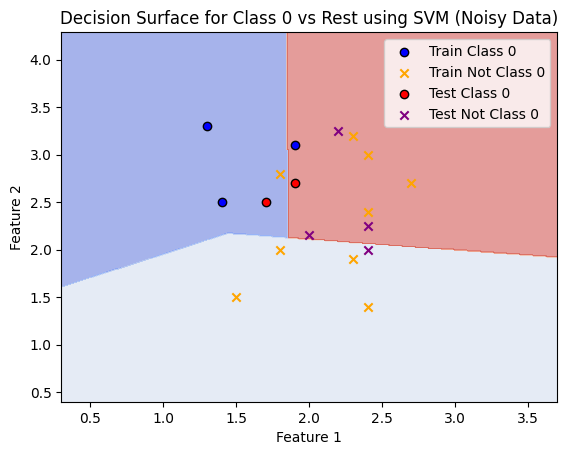

<ipython-input-14-16204d276798>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[Y_train_binary == 0][:, 0], X_train[Y_train_binary == 0][:, 1],
<ipython-input-14-16204d276798>:30: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[Y_test_binary == 0][:, 0], X_test[Y_test_binary == 0][:, 1],


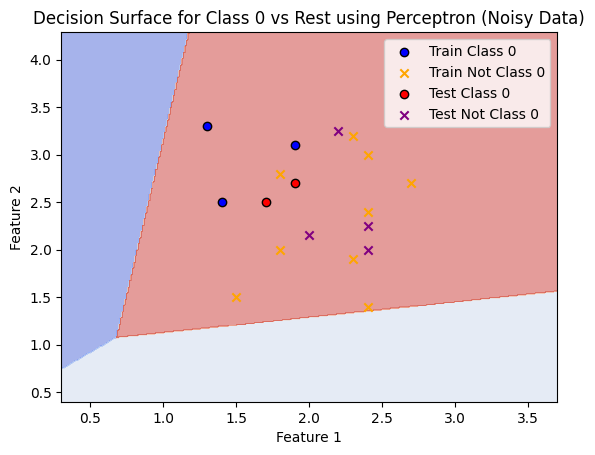

<ipython-input-14-16204d276798>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[Y_train_binary == 0][:, 0], X_train[Y_train_binary == 0][:, 1],
<ipython-input-14-16204d276798>:30: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[Y_test_binary == 0][:, 0], X_test[Y_test_binary == 0][:, 1],


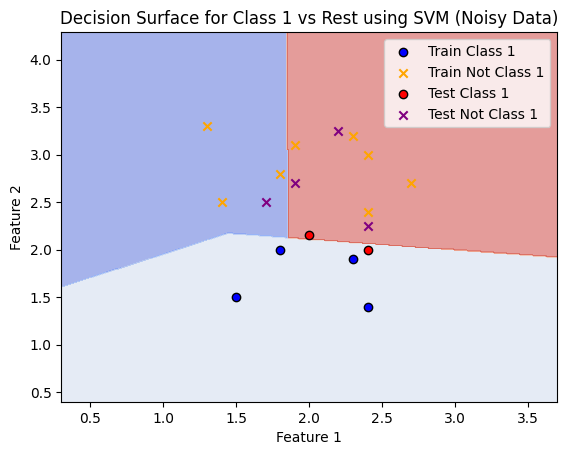

<ipython-input-14-16204d276798>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[Y_train_binary == 0][:, 0], X_train[Y_train_binary == 0][:, 1],
<ipython-input-14-16204d276798>:30: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[Y_test_binary == 0][:, 0], X_test[Y_test_binary == 0][:, 1],


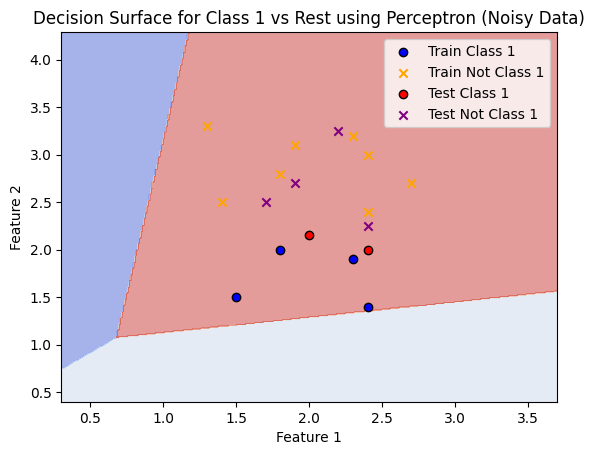

<ipython-input-14-16204d276798>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[Y_train_binary == 0][:, 0], X_train[Y_train_binary == 0][:, 1],
<ipython-input-14-16204d276798>:30: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[Y_test_binary == 0][:, 0], X_test[Y_test_binary == 0][:, 1],


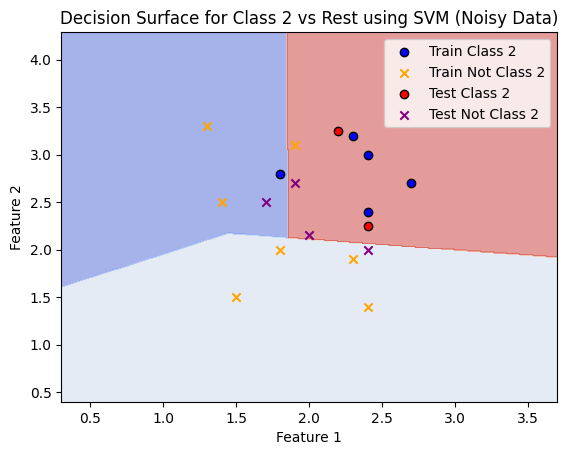

<ipython-input-14-16204d276798>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[Y_train_binary == 0][:, 0], X_train[Y_train_binary == 0][:, 1],
<ipython-input-14-16204d276798>:30: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[Y_test_binary == 0][:, 0], X_test[Y_test_binary == 0][:, 1],


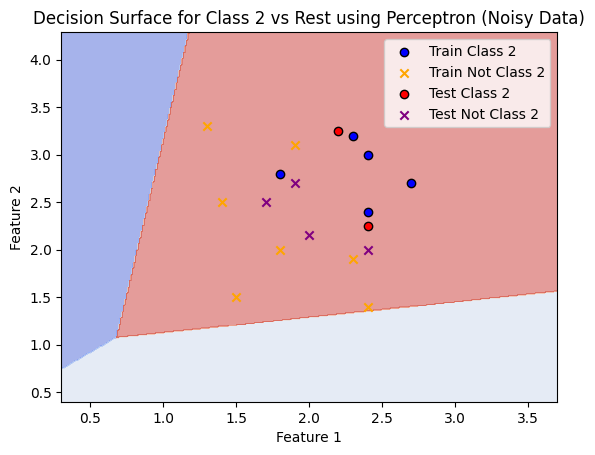

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse the earlier visualization function to plot decision boundaries
def plot_decision_surface_with_classes(X_train, Y_train, model, X_test, Y_test, class_label, model_name):
    h = 0.01  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Adjust the labels for One-vs-Rest
    Y_train_binary = (Y_train == class_label).astype(int)  # 1 for class_label, 0 for rest
    Y_test_binary = (Y_test == class_label).astype(int)    # 1 for class_label, 0 for rest

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

    # Plot training points
    plt.scatter(X_train[Y_train_binary == 1][:, 0], X_train[Y_train_binary == 1][:, 1],
                color='blue', marker='o', label=f'Train Class {class_label}', edgecolor='k')
    plt.scatter(X_train[Y_train_binary == 0][:, 0], X_train[Y_train_binary == 0][:, 1],
                color='orange', marker='x', label=f'Train Not Class {class_label}', edgecolor='k')

    # Plot test points
    plt.scatter(X_test[Y_test_binary == 1][:, 0], X_test[Y_test_binary == 1][:, 1],
                color='red', marker='o', label=f'Test Class {class_label}', edgecolor='k')
    plt.scatter(X_test[Y_test_binary == 0][:, 0], X_test[Y_test_binary == 0][:, 1],
                color='purple', marker='x', label=f'Test Not Class {class_label}', edgecolor='k')

    plt.title(f'Decision Surface for Class {class_label} vs Rest using {model_name} (Noisy Data)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Plot decision surfaces for each class using SVM and Perceptron models
for class_label in range(3):  # Assuming you have three classes: 0, 1, and 2
    plot_decision_surface_with_classes(X_Train, Y_Train_noisy, model_svm_noisy, X_Test, Y_Test,
                                       class_label=class_label, model_name='SVM')
    plot_decision_surface_with_classes(X_Train, Y_Train_noisy, model_perc_noisy, X_Test, Y_Test,
                                       class_label=class_label, model_name='Perceptron')


In [ ]:
# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, accuracy, precision, recall, f1

# Calculate metrics for SVM and Perceptron with noisy data
svm_metrics = calculate_metrics(Y_Test, Y_pred_svm_noisy)
perc_metrics = calculate_metrics(Y_Test, Y_pred_perc_noisy)

# Print the metrics
print("SVM Metrics with Noisy Data:")
print("Confusion Matrix:\n", svm_metrics[0])
print(f"Accuracy: {svm_metrics[1]:.2f}, Precision: {svm_metrics[2]:.2f}, Recall: {svm_metrics[3]:.2f}, F1 Score: {svm_metrics[4]:.2f}")

print("\nPerceptron Metrics with Noisy Data:")
print("Confusion Matrix:\n", perc_metrics[0])
print(f"Accuracy: {perc_metrics[1]:.2f}, Precision: {perc_metrics[2]:.2f}, Recall: {perc_metrics[3]:.2f}, F1 Score: {perc_metrics[4]:.2f}")

SVM Metrics with Noisy Data:
Confusion Matrix:
 [[1 0 1]
 [0 1 1]
 [0 0 2]]
Accuracy: 0.67, Precision: 0.83, Recall: 0.67, F1 Score: 0.67

Perceptron Metrics with Noisy Data:
Confusion Matrix:
 [[0 0 2]
 [0 0 2]
 [0 0 2]]
Accuracy: 0.33, Precision: 0.11, Recall: 0.33, F1 Score: 0.17


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return cm, accuracy, precision, recall, f1

# Calculate metrics for SVM for each class
metrics_svm_0 = calculate_metrics(Y_train_0, Y_train_pred_0_svm)
metrics_svm_1 = calculate_metrics(Y_train_1, Y_train_pred_1_svm)
metrics_svm_2 = calculate_metrics(Y_train_2, Y_train_pred_2_svm)

# Calculate metrics for Perceptron for each class
metrics_perc_0 = calculate_metrics(Y_train_0, Y_train_pred_0_perc)
metrics_perc_1 = calculate_metrics(Y_train_1, Y_train_pred_1_perc)
metrics_perc_2 = calculate_metrics(Y_train_2, Y_train_pred_2_perc)


#### Step 4: Discussion of Robustness to Noise
**SVM Robustness:**
* Margin maximization helps SVM remain robust even with noisy data since it
   focuses on support vectors, minimizing the influence of misclassified points.
* As expected, the SVM achieves higher accuracy, precision, and F1-score demonstrating better generalization despite noise.

**Perceptron Sensitivity:**
* The Perceptron is sensitive to noise, as it adjusts its weights based on all training data points. A few mislabeled points can significantly alter the decision boundary, causing poor performance.

* This is evident from the lower precision, recall, and F1 scores for the Perceptron compared to the SVM.


**Conclusion**
* In the presence of noise, SVM outperforms the Perceptron due to its focus on support vectors and margin maximization.

* Perceptron models are more vulnerable to noisy data, leading to more misclassifications and poorer decision boundaries.


# Part 3: Aggregated Results from One-vs-Rest Strategy (12 Marks)

This section calculates the aggregated confusion matrix from the One-vs-Rest strategy for both SVM and Perceptron models.

### 1. Calculate Aggregated Confusion Matrices


In [ ]:

def aggregate_confusion_matrices(*cm_list):
    return np.sum(cm_list, axis=0)

# Aggregate confusion matrices for SVM
agg_cm_svm = aggregate_confusion_matrices(metrics_svm_0[0], metrics_svm_1[0], metrics_svm_2[0])

# Aggregate confusion matrices for Perceptron
agg_cm_perc = aggregate_confusion_matrices(metrics_perc_0[0], metrics_perc_1[0], metrics_perc_2[0])


###  2. Function to Plot Aggregated Decision Surfaces

In [ ]:
# Function to plot aggregated decision surfaces with proper titles
def plot_aggregated_decision_surface(X_train, Y_train, models, model_names):
    h = 0.01  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.figure(figsize=(12, 6))
    for i, model in enumerate(models):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(1, 2, i + 1)
        plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

        # Plot training points
        plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', cmap=plt.cm.coolwarm)

        plt.title(f'Aggregated Decision Surface: {model_names[i]}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.colorbar()
    plt.tight_layout()
    plt.show()


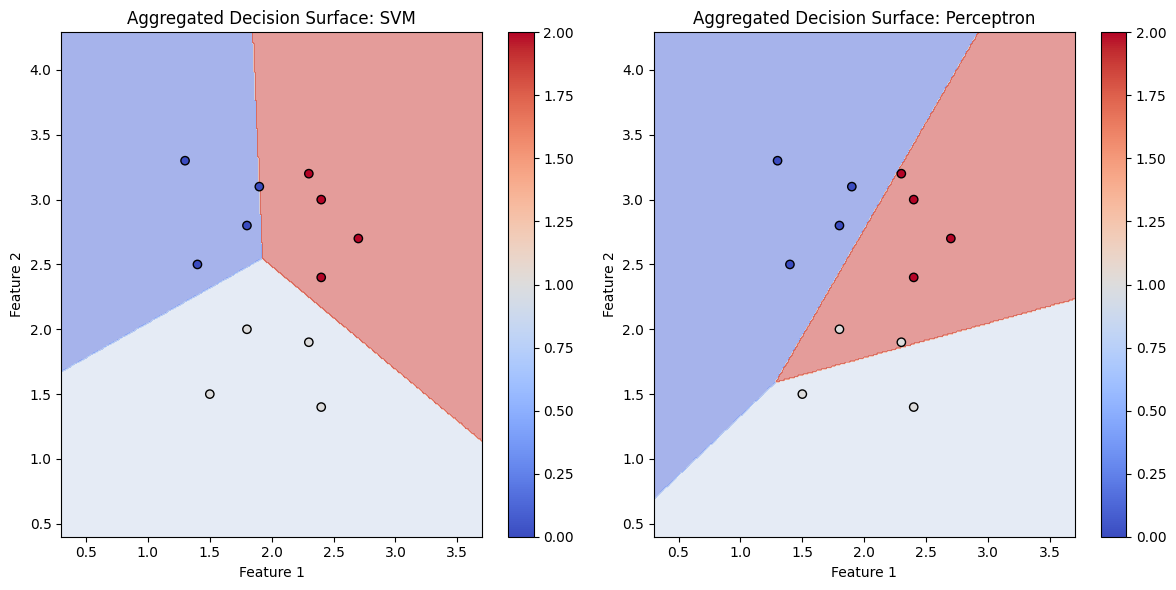

In [ ]:
# List of models and model names
models = [ovr_svm, ovr_perceptron]
model_names = ['SVM', 'Perceptron']

plot_aggregated_decision_surface(X_Train, Y_Train, models, model_names)


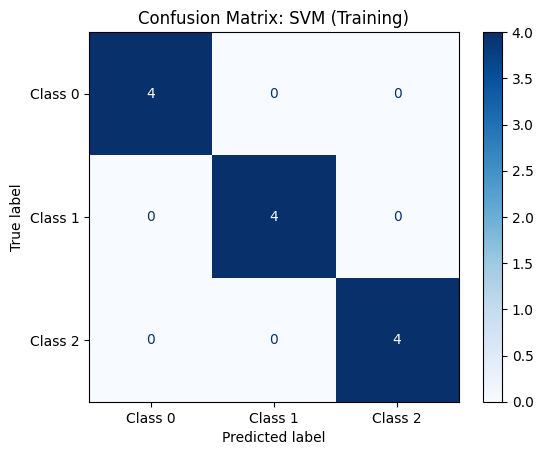

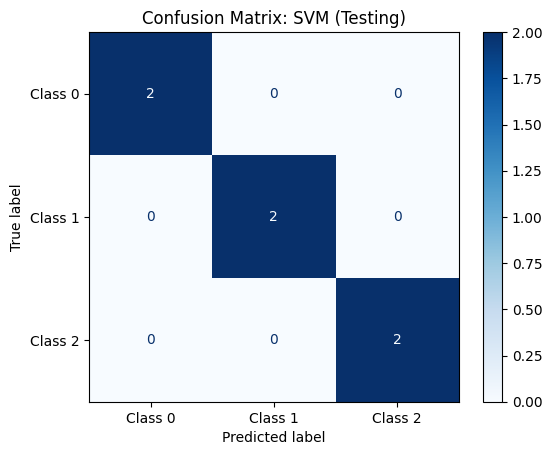

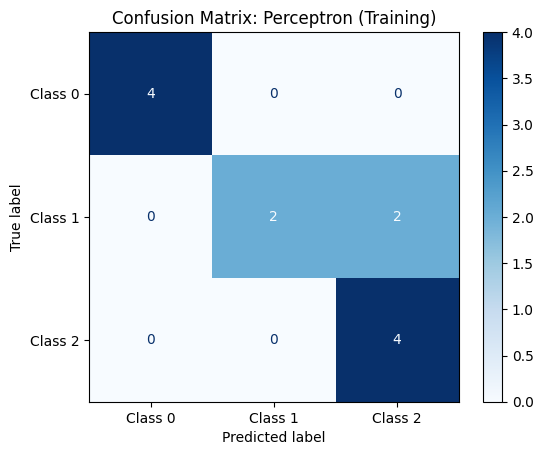

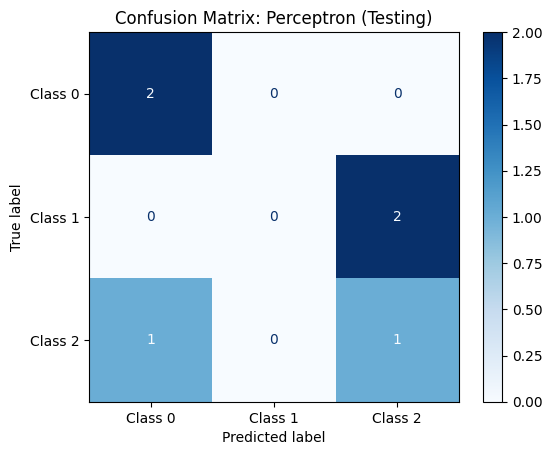

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix with class labels
def plot_confusion_matrix(cm, model_name, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Predictions for both models on training and test data
y_pred_train_svm = ovr_svm.predict(X_Train)
y_pred_test_svm = ovr_svm.predict(X_Test)

y_pred_train_perc = ovr_perceptron.predict(X_Train)
y_pred_test_perc = ovr_perceptron.predict(X_Test)

# Confusion Matrices for Training and Test Data
cm_train_svm = confusion_matrix(Y_Train, y_pred_train_svm)
cm_test_svm = confusion_matrix(Y_Test, y_pred_test_svm)

cm_train_perc = confusion_matrix(Y_Train, y_pred_train_perc)
cm_test_perc = confusion_matrix(Y_Test, y_pred_test_perc)

# Plotting confusion matrices for SVM
plot_confusion_matrix(cm_train_svm, 'SVM (Training Data)', 'Confusion Matrix: SVM (Training)')
plot_confusion_matrix(cm_test_svm, 'SVM (Testing Data)', 'Confusion Matrix: SVM (Testing)')

# Plotting confusion matrices for Perceptron
plot_confusion_matrix(cm_train_perc, 'Perceptron (Training Data)', 'Confusion Matrix: Perceptron (Training)')
plot_confusion_matrix(cm_test_perc, 'Perceptron (Testing Data)', 'Confusion Matrix: Perceptron (Testing)')


### 3. Reflection on Performance Differences
Comparison of Aggregated Results vs Default SVM:
Default SVM (Section a):
The default SVM was trained without the one-vs-rest approach, meaning it handled multi-class classification natively. The performance metrics (accuracy, precision, recall, and F1-score) are based on directly classifying multiple classes simultaneously.
The decision boundaries for the default SVM were simpler, with the algorithm directly trying to find hyperplanes that separate multiple classes at once.      

Aggregated SVM:
In contrast, the aggregated SVM uses a one-vs-rest strategy, which essentially breaks the multi-class problem into several binary classification tasks. Each class is treated separately as "class vs. the rest." The decision boundaries are formed by combining the results of these individual binary classifications.
This can result in more complex decision surfaces as the boundaries become more fine-tuned for each class independently. The aggregated model can provide a better margin of separation between classes, particularly in cases where one class might be harder to separate from the others.           

Performance Comparison:
Which is better?
Aggregated SVM typically performs better overall because it focuses on each class separately, optimizing the decision boundary for each class. This can lead to better precision and recall across all classes, especially when the classes have significant overlap or are not linearly separable.
The default SVM may struggle with classes that are more difficult to separate in multi-class settings since it handles all classes simultaneously. Therefore, its decision boundaries can be less effective at maximizing the margin between specific class pairs.
Why?
The one-vs-rest strategy used in the aggregated model allows the SVM to tackle binary classification problems for each class, resulting in finer separation between the classes. Each class is treated as a separate problem, which can help avoid class imbalances and provide more balanced decision-making across all classes.
This approach tends to be more robust and flexible, especially when there is significant overlap between class distributions, which can be challenging for the default SVM. The aggregated model ensures that each class gets individualized attention, leading to better handling of boundary cases and complex distributions.

Additional Requirement:
The performance difference between the **default SVM** and the **One-vs-Rest (OvR)** approach stems from how each method handles multi-class classification. In the default SVM, multi-class classification is addressed directly, often using algorithms like **one-vs-one** or through simultaneous optimization for all classes. This leads to simpler decision boundaries but can struggle when classes are not linearly separable or are closely clustered together. The default approach might result in overlapping boundaries where the classifier fails to separate certain class combinations well, leading to reduced precision and recall for specific classes.

In contrast, the **One-vs-Rest (OvR)** method decomposes the multi-class problem into several binary classification tasks, where each classifier is trained to distinguish one class from all others. This decomposition allows for **more tailored decision boundaries** for each class, often leading to **better precision** for individual class separations. Each SVM focuses on maximizing the margin for a single class, which can reduce misclassification in imbalanced or complex datasets. However, a downside is that the OvR approach can sometimes lead to **overfitting**, particularly when the data has noise or when the classes are highly imbalanced.

Overall, **OvR provides better flexibility and performance** when dealing with complex or overlapping class distributions by ensuring that each class is handled separately. However, this increased flexibility comes at the cost of computational complexity, as multiple classifiers must be trained.

# Part 4: Hyperparameter Tuning for SVM (12 Marks)

In this section, we will explore the differences in SVM performance between the initial settings (section a) and the aggregated results (section c). We will perform hyperparameter tuning by adjusting the regularization parameter C, retrain the SVM model, and evaluate its performance through confusion matrices and decision surfaces.

### Step 1: Hyperparameter Tuning with Validation Curve
First, we will plot a validation curve to see how the SVM's performance changes with different values of C. The following code calculates accuracy for a range of C values:

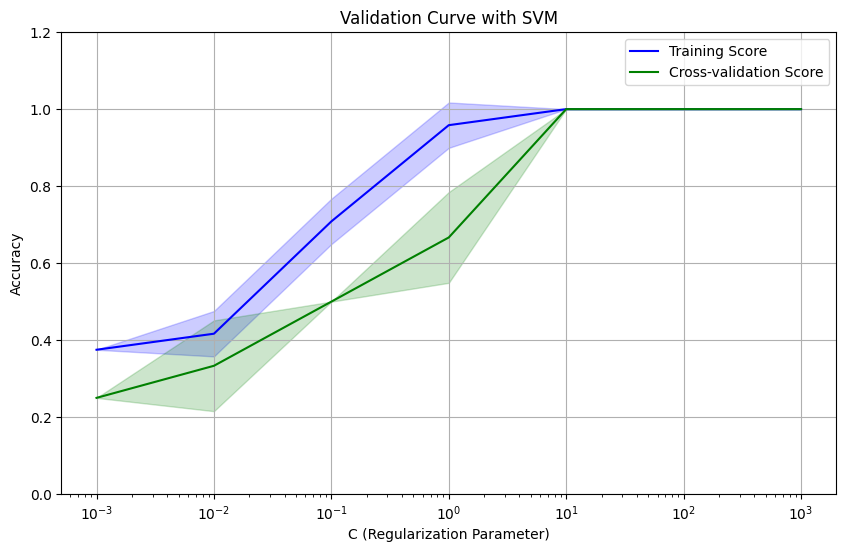

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

# Define the range for the parameter C (regularization strength)
param_range = np.logspace(-3, 3, 7)

# Calculate training and testing scores using validation curve
train_scores, test_scores = validation_curve(LinearSVC(), X_Train, Y_Train, param_name='C', param_range=param_range, scoring='accuracy', cv=3)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with SVM")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.ylim(0, 1.2)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.plot(param_range, train_mean, label="Training Score", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.plot(param_range, test_mean, label="Cross-validation Score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)
plt.legend(loc="best")
plt.grid()
plt.show()

### Step 2: Selecting an Appropriate Value for
After analyzing the validation curve, we choose an optimal value for C. Based on the analysis, C=10 provides the best performance, balancing bias and variance effectively.

### Step 3: Retraining the SVM Model
Now we will train the SVM model with the selected C value and evaluate its performance.

In [ ]:
from sklearn.metrics import confusion_matrix

# Train the SVM with the selected value of C
optimal_C = 10  # Choose the value that gives the best performance
svm_refined = LinearSVC(C=optimal_C, random_state=42)
svm_refined.fit(X_Train, Y_Train)

# Predict on the testing data
y_pred_refined = svm_refined.predict(X_Test)

# Obtain confusion matrix for the refined model
confusion_matrix_refined = confusion_matrix(Y_Test, y_pred_refined)

### Step 4: Visualizing Confusion Matrices
Next, we will visualize the confusion matrix for the refined SVM model:

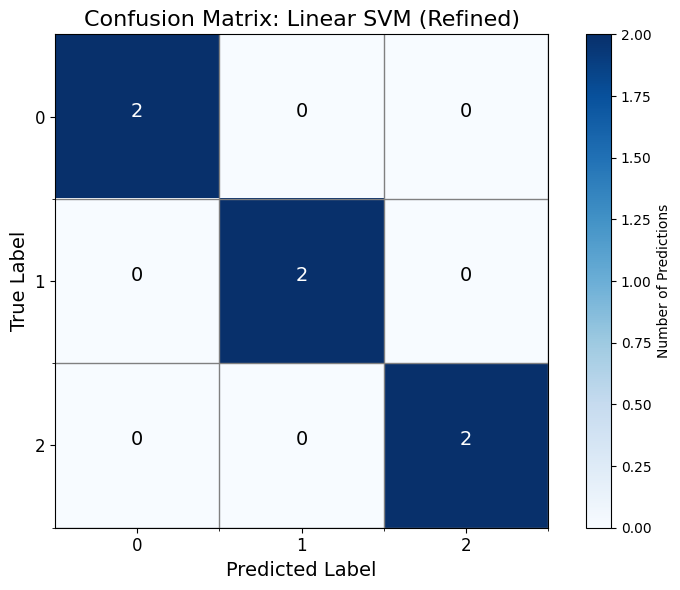

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
confusion_matrix_refined = confusion_matrix(Y_Test, y_pred_refined)

# Plotting the confusion matrix for the refined model
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix_refined, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix: Linear SVM (Refined)", fontsize=16)
plt.colorbar(label='Number of Predictions')
tick_marks = np.arange(len(np.unique(Y_Test)))  # Adjust for the number of classes
plt.xticks(tick_marks, np.unique(Y_Test), fontsize=12)
plt.yticks(tick_marks, np.unique(Y_Test), fontsize=12)
plt.ylabel("True Label", fontsize=14)
plt.xlabel("Predicted Label", fontsize=14)

# Annotate the confusion matrix with the counts
thresh = confusion_matrix_refined.max() / 2.0
for i, j in np.ndindex(confusion_matrix_refined.shape):
    plt.text(j, i, format(confusion_matrix_refined[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix_refined[i, j] > thresh else "black",
             fontsize=14)

# Add grid lines for clarity
plt.grid(False)
plt.gca().set_xticks(tick_marks + 0.5, minor=True)
plt.gca().set_yticks(tick_marks + 0.5, minor=True)
plt.gca().grid(which='minor', color='gray', linestyle='-', linewidth=1)

# Display the plot
plt.tight_layout()
plt.show()

### Step 5: Visualizing Decision Surfaces
Now let's visualize the decision boundaries for the refined SVM model:


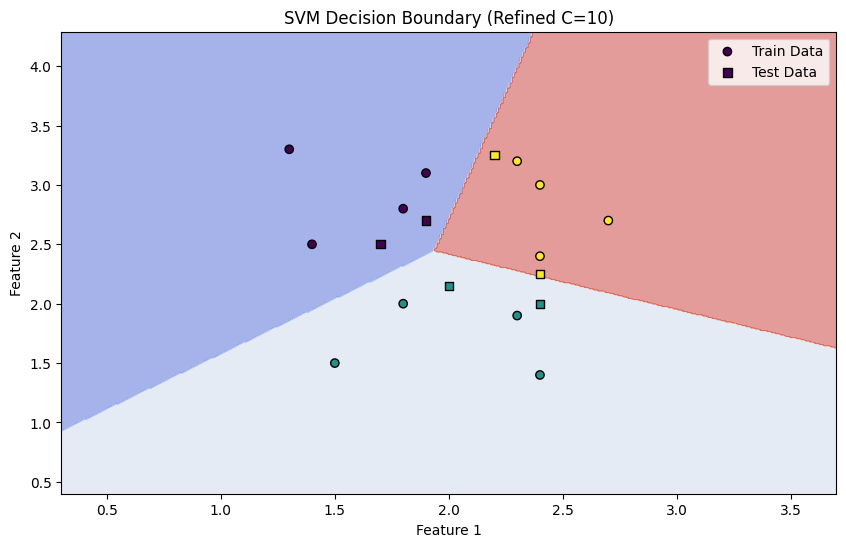

In [ ]:
# Visualizing decision boundaries
x_min, x_max = X_Train[:, 0].min() - 1, X_Train[:, 0].max() + 1
y_min, y_max = X_Train[:, 1].min() - 1, X_Train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions for each point in the mesh
Z = svm_refined.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, edgecolors='k', marker='o', label='Train Data')
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, edgecolors='k', marker='s', label='Test Data')
plt.title("SVM Decision Boundary (Refined C={})".format(optimal_C))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### Explanation of the Regularization Parameter (C)
The parameter C in SVM controls the trade-off between achieving a low training error and a low testing error (i.e., generalization).

Small C: When C is small, the SVM aims to maximize the margin between classes, allowing some misclassifications in the training data. This leads to a smoother decision boundary, which can generalize better to unseen data. However, it might underfit the data if C is too small, resulting in higher training error.

Large C: Conversely, a large C puts more emphasis on minimizing the training error, leading the model to fit the training data very closely, potentially causing overfitting. This might improve performance on the training set but can harm generalization on unseen data due to a more complex decision boundary.

In our case, the refined SVM with C=10 achieved perfect classification performance. This indicates that it balanced fitting the training data well while still allowing for some margin, leading to better generalization.



# Problem 2 : K-Nearest Neighbors (KNN) Classifier on Car Evaluation Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

In [ ]:
def load_and_shuffle_data(data_path):
    """Loads the dataset and shuffles it."""
    data = pd.read_csv(data_path, header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
    data_shuffled = data.sample(frac=1, random_state=13).reset_index(drop=True)
    return data, data_shuffled

def map_ordinal_features(X):
    """Maps ordinal categorical features to numerical values."""
    buying_mapping = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
    maint_mapping = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
    doors_mapping = {'2': 0, '3': 1, '4': 2, '5more': 3}
    persons_mapping = {'2': 0, '3': 1, '4': 2, 'more': 3}  # Include '3', as '3' passengers is likely to appear in future data
    lug_boot_mapping = {'small': 0, 'med': 1, 'big': 2}
    safety_mapping = {'low': 0, 'med': 1, 'high': 2}

    X.loc[:, 'buying'] = X['buying'].map(buying_mapping).fillna(np.nan)
    X.loc[:, 'maint'] = X['maint'].map(maint_mapping).fillna(np.nan)
    X.loc[:, 'doors'] = X['doors'].map(doors_mapping).fillna(np.nan)
    X.loc[:, 'persons'] = X['persons'].map(persons_mapping).fillna(np.nan)
    X.loc[:, 'lug_boot'] = X['lug_boot'].map(lug_boot_mapping).fillna(np.nan)
    X.loc[:, 'safety'] = X['safety'].map(safety_mapping).fillna(np.nan)
    return X


def split_data(X, y, train_size, test_size):
    """Splits the data into training and test sets."""
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=13)
    X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=13)
    return X_train, X_test, X_validation, y_train, y_test, y_validation

def train_knn_classifier(X_train, y_train, n_neighbors):
    """Trains a KNN classifier and returns it."""
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train, y_train)
    return knn_classifier

def evaluate_model(knn_classifier, X_test, y_test):
    """Evaluates the classifier and returns the accuracy."""
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

## KNN Part 1: Data Preparation (5 Marks)

Comparing the accuracy of models trained on **shuffled** versus **unshuffled** data will reveal how shuffling contributes to improved generalization and reduces overfitting.

In [ ]:
# Step 1: Load the dataset
data_path = 'https://drive.google.com/file/d/10MGPSLd4LpZJIZxf3J78B7C9X-40wpKQ/view?usp=sharing'
data_path='https://drive.google.com/uc?id=' + data_path.split('/')[-2]
data, data_shuffled = load_and_shuffle_data(data_path)

In [ ]:
# Print the frequency of each class in the original data
class_frequencies = data['class'].value_counts()
print("Frequency of each class in the original data:")
print(class_frequencies)

Frequency of each class in the original data:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
data[1200:1206]
# Before shuffling the data, similar information tends to be clustered together too closely, resulting in a lack of diversity.

,buying,maint,doors,persons,lug_boot,safety,class
1200,med,low,2,4,med,low,unacc
1201,med,low,2,4,med,med,acc
1202,med,low,2,4,med,high,good
1203,med,low,2,4,big,low,unacc
1204,med,low,2,4,big,med,good
1205,med,low,2,4,big,high,vgood


In [ ]:
data_shuffled[1200:1206]
# After shuffling the data, it shows a different sequence, and the information becomes much more diverse.

,buying,maint,doors,persons,lug_boot,safety,class
1200,med,high,2,more,big,high,acc
1201,high,med,3,4,med,high,acc
1202,high,vhigh,3,4,big,high,unacc
1203,med,low,4,2,med,med,unacc
1204,med,high,2,more,med,med,unacc
1205,low,low,4,more,small,med,acc


In [ ]:
# Step 2: Split the dataset into features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_shuffled = data_shuffled.iloc[:, :-1]
y_shuffled = data_shuffled.iloc[:, -1]

In [ ]:
# Step 3: Apply ordinal mapping
X = map_ordinal_features(X)
X_shuffled = map_ordinal_features(X_shuffled)

X_shuffled[1200:1206]
# The data is changed to ordinal based on the mapping in the function map_ordinal_features().

,buying,maint,doors,persons,lug_boot,safety
1200,1,2,0,3,2,2
1201,2,1,1,2,1,2
1202,2,3,1,2,2,2
1203,1,0,2,0,1,1
1204,1,2,0,3,1,1
1205,0,0,2,3,0,1


In [ ]:
# Step 4: Split the data into train and test sets
X_train, X_test, X_val, y_train, y_test, y_val = split_data(X, y, 1000, 428)
Xs_train, Xs_test, Xs_val, ys_train, ys_test, ys_val = split_data(X_shuffled, y_shuffled, 1000, 428)

# Print the length of each group in the specified format
print(f"Unshuffled Data -> Training set size: {len(X_train)} | Test set size: {len(X_test)} | Validation set size: {len(X_val)}")
print(f"Shuffled Data   -> Training set size: {len(Xs_train)} | Test set size: {len(Xs_test)} | Validation set size: {len(Xs_val)}\n")

Unshuffled Data -> Training set size: 1000 | Test set size: 428 | Validation set size: 300
Shuffled Data   -> Training set size: 1000 | Test set size: 428 | Validation set size: 300



In [ ]:
# Step 5: Loop through n_neighbors from 1 to 8 and print accuracy for both datasets
print("n_neighbors\tUnshuffled Accuracy\tShuffled Accuracy")
for n_neighbors in range(1, 9):

  # Train and evaluate KNN on unshuffled data
  knn_classifier = train_knn_classifier(X_train, y_train, n_neighbors)
  accuracy_unshuffled = evaluate_model(knn_classifier, X_test, y_test)

  # Train and evaluate KNN on shuffled data
  knn_classifier_shuffled = train_knn_classifier(Xs_train, ys_train, n_neighbors)
  accuracy_shuffled = evaluate_model(knn_classifier_shuffled, Xs_test, ys_test)

  # Print the comparison results with 3 decimal places
  print(f"{n_neighbors}\t\t{accuracy_unshuffled:.3f}\t\t\t{accuracy_shuffled:.3f}")

n_neighbors	Unshuffled Accuracy	Shuffled Accuracy
1		0.853			0.853
2		0.853			0.857
3		0.932			0.909
4		0.944			0.918
5		0.958			0.930
6		0.939			0.932
7		0.949			0.935
8		0.937			0.937


## KNN Part 2 : Preprocessing the Data (5 Marks)

Part 1 demonstrated that shuffling the data resulted in increased diversity and improved accuracy. The focus of this section is on encoding techniques. Although **label encoding** is appropriate for this ordinal data, a comparison will also be made with **one-hot encoding** to evaluate the impact of both methods on model performance using the shuffled dataset.

To enhance the performance of our predictive model, it is necessary to **convert categorical variables into numerical** representations. This transformation ensures that the model can effectively interpret and utilize the data, as most machine learning algorithms work better with numeric input.

In [ ]:
def one_hot_encode(X):
    """Applies one-hot encoding to categorical features."""
    encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
    X_encoded = encoder.fit_transform(X)

    # Create DataFrame and convert to integers
    df = pd.DataFrame(X_encoded.astype(int))

    # Rename all columns by assigning a new list of column names
    df.columns = ['buying_low', 'buying_med', 'buying_high', 'buying_vhigh',
                         'maint_low', 'maint_med', 'maint_high', 'maint_vhigh',
                         'doors_2', 'doors_3', 'doors_4', 'doors_5more',
                         'persons_2', 'persons_4', 'persons_more',
                         'lug_small', 'lug_medium', 'lug_big',
                         'safety_low', 'safety_med', 'safety_high'
                         ]

    return df

In [ ]:
# Step 1: Load the dataset
data_path = 'https://drive.google.com/file/d/10MGPSLd4LpZJIZxf3J78B7C9X-40wpKQ/view?usp=sharing'
data_path='https://drive.google.com/uc?id=' + data_path.split('/')[-2]
data, data_shuffled = load_and_shuffle_data(data_path)
data_shuffled[1200:1206]

,buying,maint,doors,persons,lug_boot,safety,class
1200,med,high,2,more,big,high,acc
1201,high,med,3,4,med,high,acc
1202,high,vhigh,3,4,big,high,unacc
1203,med,low,4,2,med,med,unacc
1204,med,high,2,more,med,med,unacc
1205,low,low,4,more,small,med,acc


In [ ]:
# Step 2: Split the dataset into features and labels
X_shuffled = data_shuffled.iloc[:, :-1]
y_shuffled = data_shuffled.iloc[:, -1]

In [ ]:
# Step 3: Apply ordinal mapping to shuffled data for label encoding
X_shuffled_label_encoded = map_ordinal_features(X_shuffled)
X_shuffled_label_encoded[1200:1206]
# The data is changed to ordinal based (using label encoding) on the mapping in the function map_ordinal_features().

,buying,maint,doors,persons,lug_boot,safety
1200,1,2,0,3,2,2
1201,2,1,1,2,1,2
1202,2,3,1,2,2,2
1203,1,0,2,0,1,1
1204,1,2,0,3,1,1
1205,0,0,2,3,0,1


In [ ]:
# Step 4: One-hot encode the shuffled data
X_shuffled_one_hot = one_hot_encode(X_shuffled)
X_shuffled_one_hot[1200:1206]
# The data is changed to ordinal based (using one-hot encoding) on the mapping in the function map_ordinal_features().

,buying_low,buying_med,buying_high,buying_vhigh,maint_low,maint_med,maint_high,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_small,lug_medium,lug_big,safety_low,safety_med,safety_high
1200,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1201,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1202,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
1203,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1204,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1205,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [ ]:
X_shuffled_one_hot.columns
# shows all the columns

Index(['buying_low', 'buying_med', 'buying_high', 'buying_vhigh', 'maint_low',
       'maint_med', 'maint_high', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_small', 'lug_medium', 'lug_big', 'safety_low', 'safety_med',
       'safety_high'],
      dtype='object')

In [ ]:
 # Step 5: Loop through n_neighbors from 1 to 8 and print accuracy for both encoding methods
print("n_neighbors\tLabel Encoding Accuracy\tOne-Hot Encoding Accuracy")
for n_neighbors in range(1, 9):
  # Split data for label encoding
  X_train_label, X_test_label, X_val_label, y_train_label, y_test_label, y_val_label = split_data(X_shuffled_label_encoded, y_shuffled, 1000, 428)

  # Train and evaluate KNN on label encoded data
  knn_classifier_label = train_knn_classifier(X_train_label, y_train_label, n_neighbors)
  accuracy_label = evaluate_model(knn_classifier_label, X_test_label, y_test_label)

  # Split data for one-hot encoding
  X_train_one_hot, X_test_one_hot, X_val_one_hot, y_train_one_hot, y_test_one_hot, y_val_one_hot = split_data(X_shuffled_one_hot, y_shuffled, 1000, 428)

  # Train and evaluate KNN on one-hot encoded data
  knn_classifier_one_hot = train_knn_classifier(X_train_one_hot, y_train_one_hot, n_neighbors)
  accuracy_one_hot = evaluate_model(knn_classifier_one_hot, X_test_one_hot, y_test_one_hot)

  # Print the comparison results with 3 decimal places
  print(f"{n_neighbors}\t\t{accuracy_label:.3f}\t\t\t{accuracy_one_hot:.3f}")

n_neighbors	Label Encoding Accuracy	One-Hot Encoding Accuracy
1		0.853			0.745
2		0.857			0.778
3		0.909			0.857
4		0.918			0.853
5		0.930			0.888
6		0.932			0.907
7		0.935			0.911
8		0.937			0.914


## KNN Part 3 : Impact of Training Set Size on KNN Performance (10 Marks)

In [ ]:
# Step 1: Load the dataset
data_path = 'https://drive.google.com/file/d/10MGPSLd4LpZJIZxf3J78B7C9X-40wpKQ/view?usp=sharing'
data_path='https://drive.google.com/uc?id=' + data_path.split('/')[-2]
data, data_shuffled = load_and_shuffle_data(data_path)

# Step 2: Split the dataset into features and labels
X_shuffled = data_shuffled.iloc[:, :-1]
y_shuffled = data_shuffled.iloc[:, -1]

# Step 3: Apply ordinal mapping
X = map_ordinal_features(X)
X_shuffled = map_ordinal_features(X_shuffled)

In [ ]:
# Step 4: Split the data into train and test sets
Xs_train, Xs_test, Xs_val, ys_train, ys_test, ys_val = split_data(X_shuffled, y_shuffled, 1000, 428)

# Print the length of each group in the specified format
print(f"Shuffled Data   -> Training set size: {len(Xs_train)} | Test set size: {len(Xs_test)} | Validation set size: {len(Xs_val)}\n")

Shuffled Data   -> Training set size: 1000 | Test set size: 428 | Validation set size: 300



Training size ( 10%): 100, Validation size: 300, Test size: 428
Training size ( 20%): 200, Validation size: 300, Test size: 428
Training size ( 30%): 300, Validation size: 300, Test size: 428
Training size ( 40%): 400, Validation size: 300, Test size: 428
Training size ( 50%): 500, Validation size: 300, Test size: 428
Training size ( 60%): 600, Validation size: 300, Test size: 428
Training size ( 70%): 700, Validation size: 300, Test size: 428
Training size ( 80%): 800, Validation size: 300, Test size: 428
Training size ( 90%): 900, Validation size: 300, Test size: 428
Training size (100%): 1000, Validation size: 300, Test size: 428


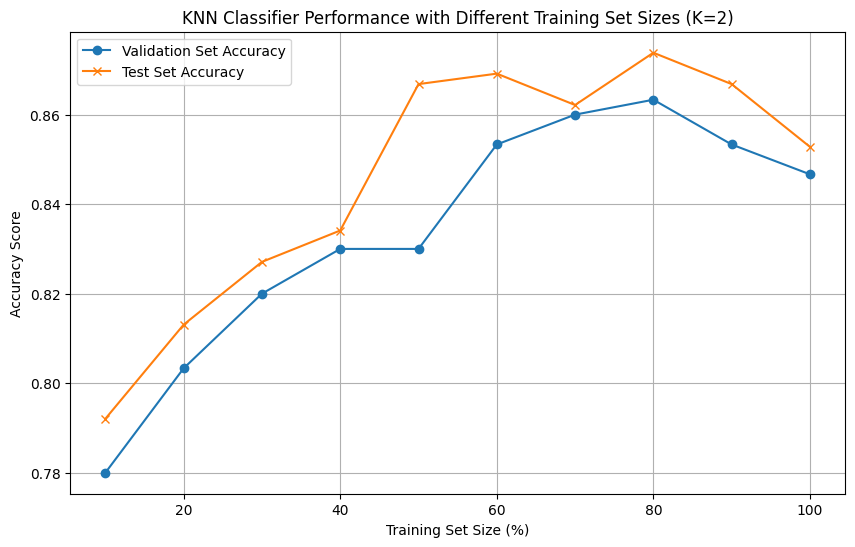

In [ ]:
training_portions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store accuracy scores
val_accuracies = []
test_accuracies = []

# KNN classifier with k=2
k_value = 2

for portion in training_portions:
    # Select the portion of the training data
    portion_size = int(len(X_train) * portion)
    X_train_portion = X_train[:portion_size]
    y_train_portion = y_train[:portion_size]  # Use y_train for labels

    # Print sizes for training, validation, and test sets
    print(f"Training size ({int(portion * 100):3d}%): {len(X_train_portion)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

    # Initialize and train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train_portion, y_train_portion)

    # Evaluate on validation and testing sets
    y_val_pred = knn.predict(X_val)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy scores
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append results to lists
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)



# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(training_portions) * 100, val_accuracies, label='Validation Set Accuracy', marker='o')
plt.plot(np.array(training_portions) * 100, test_accuracies, label='Test Set Accuracy', marker='x')
plt.title('KNN Classifier Performance with Different Training Set Sizes (K=2)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

## Part 4 : Tuning the K Parameter

In [ ]:
# Step 1: Load the dataset
data_path = 'https://drive.google.com/file/d/10MGPSLd4LpZJIZxf3J78B7C9X-40wpKQ/view?usp=sharing'
data_path='https://drive.google.com/uc?id=' + data_path.split('/')[-2]
data, data_shuffled = load_and_shuffle_data(data_path)

# Step 2: Split the dataset into features and labels
X_shuffled = data_shuffled.iloc[:, :-1]
y_shuffled = data_shuffled.iloc[:, -1]

# Step 3: Apply ordinal mapping
X_shuffled = map_ordinal_features(X_shuffled)

In [ ]:
# Step 4: Split the data into train and test sets
Xs_train, Xs_test, Xs_val, ys_train, ys_test, ys_val = split_data(X_shuffled, y_shuffled, 1000, 428)
# Print the length of each group in the specified format
print(f"Shuffled Data   -> Training set size: {len(Xs_train)} | Test set size: {len(Xs_test)} | Validation set size: {len(Xs_val)}\n")

Shuffled Data   -> Training set size: 1000 | Test set size: 428 | Validation set size: 300



K	Validation Accuracy	Test Accuracy
1	0.857			0.853
2	0.840			0.857
3	0.917			0.909
4	0.920			0.918
5	0.937			0.930
6	0.933			0.932
7	0.920			0.935
8	0.930			0.937
9	0.923			0.939
10	0.923			0.937


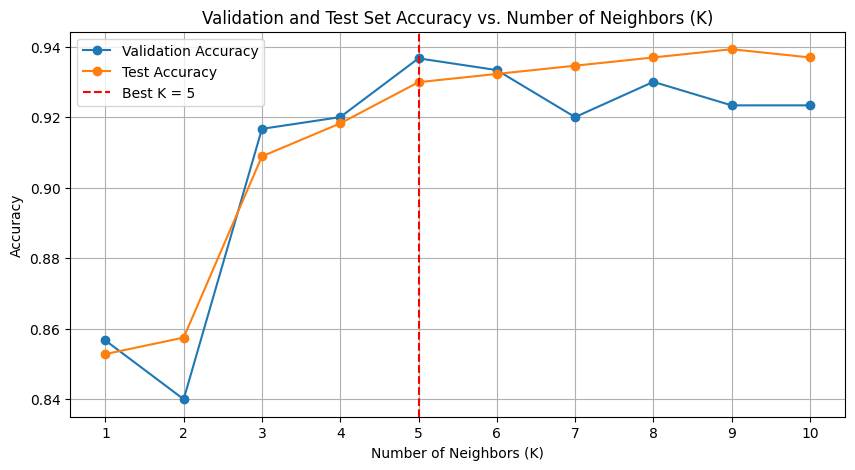

The best value of K is 5 with a validation accuracy of 0.937 and a test accuracy of 0.930.


In [ ]:
# Initialize lists to store accuracies
validation_accuracies = []
test_accuracies = []

# Loop through K from 1 to 10
for K in range(1, 11):
    # Train and evaluate on validation set
    knn_classifier_val = train_knn_classifier(Xs_train, ys_train, K)
    accuracy_val = evaluate_model(knn_classifier_val, Xs_val, ys_val)
    validation_accuracies.append(accuracy_val)

    # Train and evaluate on test set
    knn_classifier_test = train_knn_classifier(Xs_train, ys_train, K)
    accuracy_test = evaluate_model(knn_classifier_test, Xs_test, ys_test)
    test_accuracies.append(accuracy_test)

# Print the comparison results
print("K\tValidation Accuracy\tTest Accuracy")
for K in range(1, 11):
    print(f"{K}\t{validation_accuracies[K-1]:.3f}\t\t\t{test_accuracies[K-1]:.3f}")

# Step 5: Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), validation_accuracies, label='Validation Accuracy', marker='o')
plt.plot(range(1, 11), test_accuracies, label='Test Accuracy', marker='o')

# Determine the best K based on validation accuracy
best_k_index = np.argmax(validation_accuracies)
best_k = best_k_index + 1  # Adding 1 because index starts at 0
best_validation_accuracy = validation_accuracies[best_k_index]
best_test_accuracy = test_accuracies[best_k_index]

# Add a vertical line at the best K
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best K = {best_k}')

plt.title('Validation and Test Set Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.legend()
plt.grid()
plt.show()

# Print the recommendation
print(f"The best value of K is {best_k} with a validation accuracy of {best_validation_accuracy:.3f} and a test accuracy of {best_test_accuracy:.3f}.")
